### NLP Assignment 1
Natalie Kim

**Note:** your records counts will be different, depending on when you query the API


In [1]:
import pandas as pd
import requests

In [2]:
%%time

# Define the API endpoint and parameters
url = "https://data.cityofchicago.org/resource/cwig-ma7x.json"

# Fetch the total count of records
def get_total_count(url):
    params = {
        "$select": "count(*)"
    }
    response = requests.get(url, params=params)
    data = response.json()
    return int(data[0]['count'])

total_count = get_total_count(url)
print(f"Total number of records available: {total_count:,.0f}")

Total number of records available: 285,397
CPU times: user 123 ms, sys: 8.12 ms, total: 131 ms
Wall time: 707 ms


In [3]:
%%time

# Fetch data and load it into a pandas DataFrame
def fetch_data(url, params):
    response = requests.get(url, params=params)
    data = response.json()
    return pd.DataFrame(data)

# Set the limit parameter equal to the number of available records
params = {
    "$limit": total_count
}

# Fetch the data and load it into a DataFrame
df = fetch_data(url, params)

print(f'Number of records retrieved: {df.shape[0]:,.0f}')

Number of records retrieved: 285,397
CPU times: user 4.95 s, sys: 1.39 s, total: 6.34 s
Wall time: 37.1 s


In [4]:
df.head(5)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,location,location_address,location_city,location_state,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,2610306,SEE THRU CHINESE KITCHEN,SEE THRU CHINESE KITCHEN,2368719,Restaurant,Risk 1 (High),7613 S JEFFERY BLVD,CHICAGO,IL,60649,...,"{'type': 'Point', 'coordinates': [-87.57594788...",,,,,9,22538,39,420,35
1,2610308,RICHARDSON MIDDLE SCHOOL,RICHARDSON MIDDLE SCHOOL,3619531,School,Risk 1 (High),6018 S KARLOV AVE,CHICAGO,IL,60629,...,"{'type': 'Point', 'coordinates': [-87.72548610...",,,,,23,21867,63,292,6
2,2610262,NEW NAAN ON DEVON & GRILL,NEW NAAN ON DEVON & GRILL,1927149,Restaurant,Risk 1 (High),2241 W DEVON AVE,CHICAGO,IL,60659,...,"{'type': 'Point', 'coordinates': [-87.68659940...",,,,,42,4450,20,53,27
3,2610293,SUBWAY,SUBWAY,2457878,Restaurant,Risk 1 (High),3952 N SHERIDAN RD,CHICAGO,IL,60613,...,"{'type': 'Point', 'coordinates': [-87.65468607...",,,,,38,21186,57,83,39
4,2610266,ST. JOHN FISHER,ST. JOHN FISHER,3076641,School,Risk 1 (High),10200 S WASHTENAW AVE,CHICAGO,IL,60655,...,"{'type': 'Point', 'coordinates': [-87.68922181...",,,,,33,4447,71,661,42


#### 1. Select only the records corresponding to failed inspection (see "results" column)

In [5]:
# records that failed inspection
failed_inspect = df[df['results'] == 'Fail']

failed_inspect.head()

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,location,location_address,location_city,location_state,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,2610306,SEE THRU CHINESE KITCHEN,SEE THRU CHINESE KITCHEN,2368719,Restaurant,Risk 1 (High),7613 S JEFFERY BLVD,CHICAGO,IL,60649,...,"{'type': 'Point', 'coordinates': [-87.57594788...",,,,,9,22538,39,420,35
11,2610285,BARBA YIANNI TAVERNA INC.,BARBA YIANNI TAVERNA,2196054,Restaurant,Risk 1 (High),4761 N LINCOLN AVE,CHICAGO,IL,60625,...,"{'type': 'Point', 'coordinates': [-87.68817246...",,,,,13,21849,6,665,18
13,2610295,BARTON ELEMENTARY SCHOOL,BARTON ELEMENTARY SCHOOL,22151,School,Risk 1 (High),7650 S Wolcott (1900W),CHICAGO,IL,60620,...,"{'type': 'Point', 'coordinates': [-87.67096452...",,,,,6,21554,70,573,31
17,2610245,SUBWAY,SUBWAY,1272424,Restaurant,Risk 1 (High),1020 W BELMONT AVE,CHICAGO,IL,60657,...,"{'type': 'Point', 'coordinates': [-87.65501149...",,,,,38,4449,57,710,25
20,2610214,THOMAS COFFEE SHOP,THOMAS COFFEE SHOP,7545,Restaurant,Risk 1 (High),1657 E 87TH ST,CHICAGO,IL,60617,...,"{'type': 'Point', 'coordinates': [-87.58294662...",,,,,9,21202,44,473,35


#### 2. Clean the data, making sure that there are no NaNs in "violations" column

In [6]:
failed_inspect_clean = failed_inspect.dropna(subset=['violations'])

failed_inspect_clean.shape[0]

51899

#### 3 & 4
3. Using regular expression, parse "violations" column to select only regulation descriptions, no code or comments
4. "Violations" column lists the reasons for inspection failure. Those reasons are separated by "|".  Each reason consists of a regulation code, regulation description, and comments describing how the regulation was violated. 

In [7]:
failed_inspect_clean['violations'].head(3)

0     37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...
11    10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...
13    10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...
Name: violations, dtype: object

In [8]:
import re

In [9]:
# extracting regulation descriptions
def extract_reg_desc(violations):
    # splitting on '|' to separate individual violations
    violation_entries = violations.split('|')

    # extract descriptions
    descriptions = []
    for entry in violation_entries:
        # description after code & '.' and before ' - '
        match = re.search(r'\d+\.\s(.*?)(?:\s-\s|$)', entry)
        if match:
            descriptions.append(match.group(1).strip())

    return descriptions

In [10]:
# applying function to violations column
failed_inspect_clean['regulation_descriptions'] = failed_inspect_clean['violations'].apply(extract_reg_desc)

# Display the updated DataFrame with only the regulation descriptions
failed_inspect_clean[['violations', 'regulation_descriptions']].head()

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_60746/3226752884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_inspect_clean['regulation_descriptions'] = failed_inspect_clean['violations'].apply(extract_reg_desc)


,violations,regulation_descriptions
0,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,"[FOOD PROPERLY LABELED; ORIGINAL CONTAINER, IN..."
11,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...
13,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...
17,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,"[THERMOMETERS PROVIDED & ACCURATE, CONTAMINATI..."
20,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...","[INSECTS, RODENTS, & ANIMALS NOT PRESENT, WIPI..."


#### 5. Count how many times each regulation description occurred in the table and visualize top-10 the most frequent regulation descriptions

In [11]:
# flatten descriptions into single list
all_descriptions = [desc for descriptions in failed_inspect_clean['regulation_descriptions'] for desc in descriptions]

# occurence count of each regulation description
desc_count = pd.Series(all_descriptions).value_counts()

# top ten
top_ten_desc = desc_count.head(10)


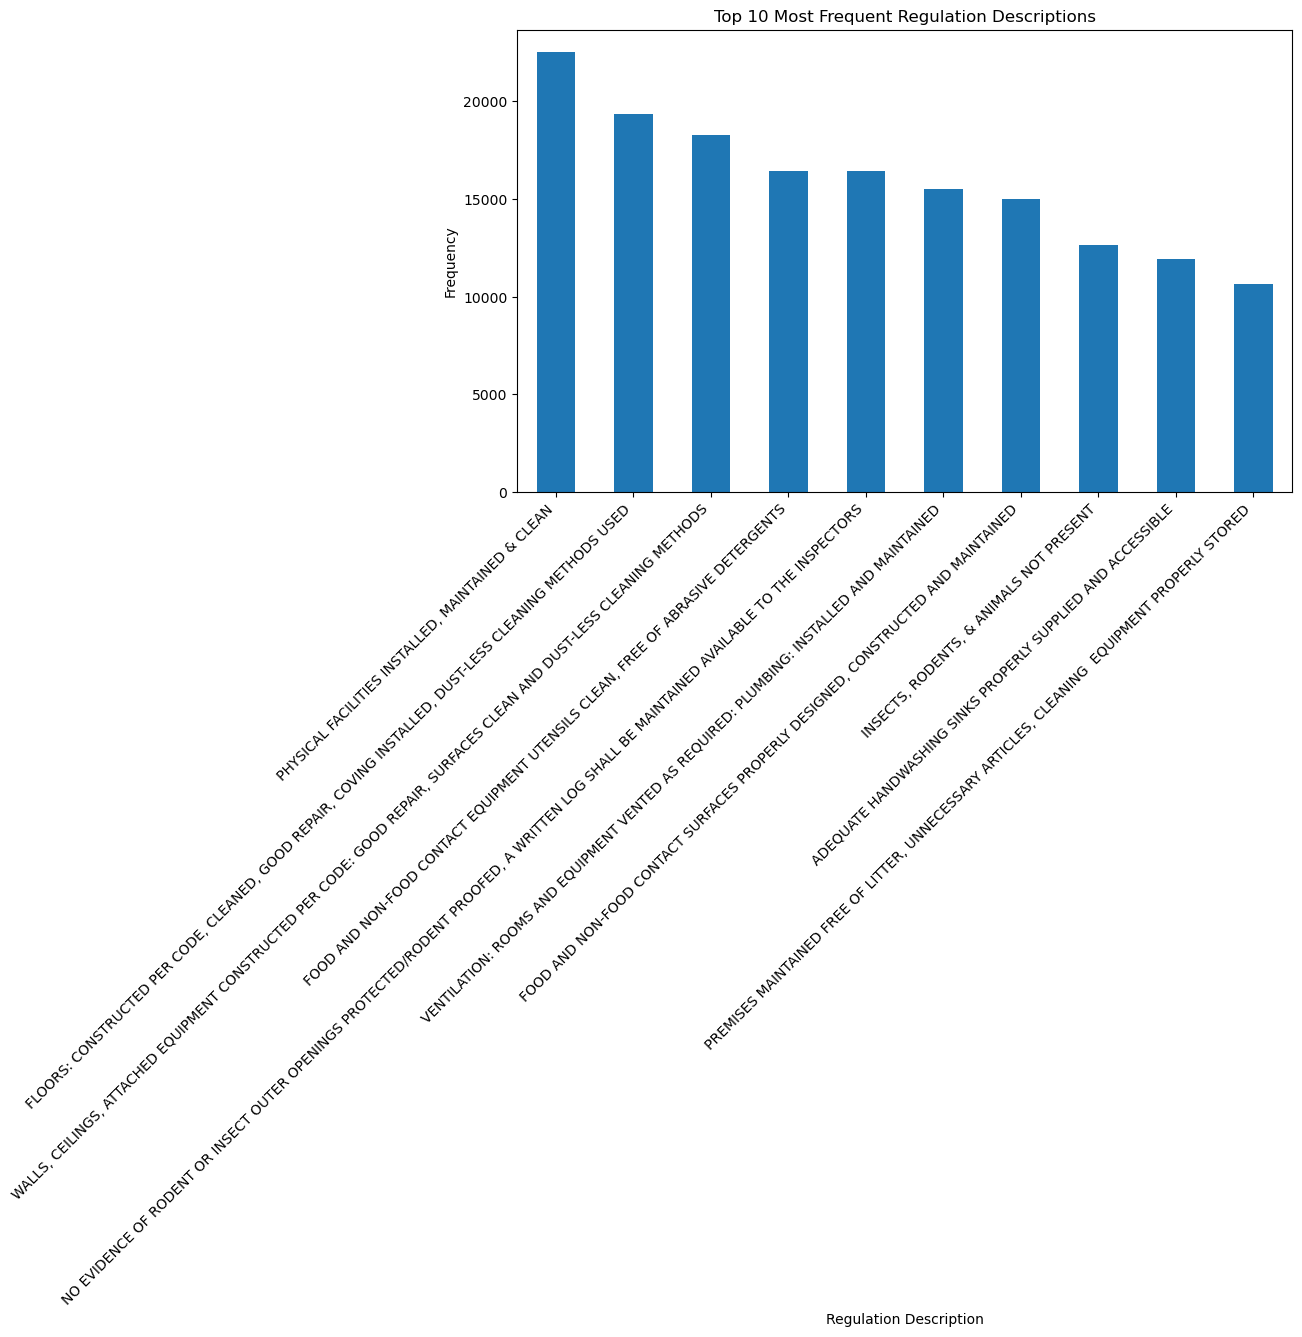

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_ten_desc.plot(kind='bar')
plt.title('Top 10 Most Frequent Regulation Descriptions')
plt.xlabel('Regulation Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


#### 6. Identify whether any of these restaurants are repeat offenders and whether the violations are the same or different for these repeat offenses
(explore a combination of License, Business Name and Address variables to determine what is the best way to uniquely identify a business)

In [14]:
# Subsetting for just restaurants
df_rest = failed_inspect_clean[failed_inspect_clean['facility_type'] == 'Restaurant']

In [15]:
df_rest.shape[0]

33964

In [16]:
# identifying business by license, business name
scenario1 = df_rest.groupby(['license_', 'dba_name']).ngroups
print(f"by license & business name: {scenario1}")

# identifying businesss by business name & address
scenario2 = df_rest.groupby(['dba_name','address']).ngroups
print(f"by address & business name: {scenario2}")

# identifying business by license & address
scenario3 = df_rest.groupby(['license_', 'address']).ngroups
print(f"by license & address: {scenario3}")

# identifying business by license, business name, address
scenario4 = df_rest.groupby(['license_','dba_name','address']).ngroups
print(f"by license, business name, address: {scenario4}")

by license & business name: 14435
by address & business name: 17335
by license & address: 17958
by license, business name, address: 18223


In [20]:
# unique business identifier
df_rest.loc[:, 'rest_identifier'] = df_rest['license_'] + " | " + df_rest['dba_name'] + " | " + df_rest['address']

# find repeating offenders
repeat_offenders = df_rest.groupby('rest_identifier').size().reset_index(name='violation_count')
repeat_offenders = repeat_offenders[repeat_offenders['violation_count'] > 1]

print(repeat_offenders.head())

                                      rest_identifier  violation_count
3   0 | BABAS STEAK AND LEMONADE | 3407 1/2 W MADI...                2
43                 0 | RIB LADY 2 | 4203 W CERMAK RD                 3
56               0 | Vida Y Salud | 3009 W CERMAK RD                 2
60  1000049 | PEREZ MEXICAN FOOD | 853-855 W RANDO...                4
61  1000245 | DUFFY'S TAVERN & GRILLE | 420 1/2 W ...                5


In [23]:
# checking the violations of the repeating offenders
# all violations for each restaurant
repeat_offenders_violations = df_rest[df_rest['rest_identifier'].isin(repeat_offenders['rest_identifier'])]
repeat_offenders_violations = repeat_offenders_violations.explode('regulation_descriptions')

# group by 'rest_identifier' and occurrences of each violation
violation_count = repeat_offenders_violations.groupby(
    ['rest_identifier','regulation_descriptions']).size().reset_index(name='count')

# restaurants with repeated violations of the same type
repeat_violations = violation_count[violation_count['count'] > 1]

print(repeat_violations.head())

                                     rest_identifier  \
0  0 | BABAS STEAK AND LEMONADE | 3407 1/2 W MADI...   
1  0 | BABAS STEAK AND LEMONADE | 3407 1/2 W MADI...   
3  0 | BABAS STEAK AND LEMONADE | 3407 1/2 W MADI...   
5  0 | BABAS STEAK AND LEMONADE | 3407 1/2 W MADI...   
8  0 | BABAS STEAK AND LEMONADE | 3407 1/2 W MADI...   

                             regulation_descriptions  count  
0  ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED A...      2  
1      ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING      2  
3  FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PR...      2  
5            INSECTS, RODENTS, & ANIMALS NOT PRESENT      2  
8                               PERSONAL CLEANLINESS      2  


In [25]:
# restaurants that are repeating offenders of the same violation
repeating_offenders_summary = repeat_violations.groupby('rest_identifier').size().reset_index(name='repeated_violation_count')

In [26]:
repeating_offenders_summary.head()

,rest_identifier,repeated_violation_count
0,0 | BABAS STEAK AND LEMONADE | 3407 1/2 W MADI...,5
1,0 | RIB LADY 2 | 4203 W CERMAK RD,11
2,0 | Vida Y Salud | 3009 W CERMAK RD,3
3,1000049 | PEREZ MEXICAN FOOD | 853-855 W RANDO...,6
4,1000245 | DUFFY'S TAVERN & GRILLE | 420 1/2 W ...,12


#### 7. Review the restaurants "Out of Business", is there an extended history of prior violations for these closed restaurants?

In [28]:
print(df['results'].unique())

['Fail' 'Pass' 'Out of Business' 'Pass w/ Conditions' 'No Entry'
 'Not Ready' 'Business Not Located']


In [31]:
out_of_business_df = df[df['results'] == 'Out of Business']

# adding business identifier
out_of_business_df.loc[:, 'rest_identifier'] = out_of_business_df['license_'] + " | " + out_of_business_df['dba_name'] + " | " + out_of_business_df['address']

out_of_business_df.head()

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_60746/1567594346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_business_df.loc[:, 'rest_identifier'] = out_of_business_df['license_'] + " | " + out_of_business_df['dba_name'] + " | " + out_of_business_df['address']


,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,location_address,location_city,location_state,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,rest_identifier
7,2610277,FANTASTIC FOOD MART INC,FANTASTIC FOOD MART INC,2929234,Grocery Store,Risk 3 (Low),2453 E 75TH ST,CHICAGO,IL,60649,...,,,,,43,22538,39,245,37,2929234 | FANTASTIC FOOD MART INC | 2453 E 75T...
15,2610248,SWEET N' HEALTHY,SWEET N' HEALTHY,2813208,Restaurant,Risk 2 (Medium),3950 W LAWRENCE AVE,CHICAGO,IL,60625,...,,,,,28,21849,14,120,12,2813208 | SWEET N' HEALTHY | 3950 W LAWRENCE AVE
36,2610173,"RIO TACO'S, INC.",RIO TACOS,2718043,Restaurant,Risk 1 (High),3246-3248 W FOSTER AVE,CHICAGO,IL,60625,...,,,,,28,21849,13,167,38,"2718043 | RIO TACO'S, INC. | 3246-3248 W FOSTE..."
43,2610142,OOOH WEE IT IS,OOOH WEE IT IS,2771442,Restaurant,Risk 1 (High),33 E 83RD ST,CHICAGO,IL,60619,...,,,,,31,21546,40,406,32,2771442 | OOOH WEE IT IS | 33 E 83RD ST
68,2610150,TORTELLO,TORTELLO,2642096,Restaurant,Risk 1 (High),1746 W DIVISION ST,CHICAGO,IL,60622,...,,,,,24,21560,25,481,41,2642096 | TORTELLO | 1746 W DIVISION ST


In [45]:
oob_repeat_offenders = out_of_business_df[out_of_business_df['rest_identifier'].isin(repeating_offenders_summary['rest_identifier'])]

aligned_count = oob_repeat_offenders['rest_identifier'].nunique()
total_out_of_business = out_of_business_df['rest_identifier'].nunique()

print(f"Number of out-of-business repeating offenders: {aligned_count}")
print(f"Total number of out-of-business businesses: {total_out_of_business}")

aligned_oob_repeating_summary = oob_repeat_offenders.groupby('rest_identifier')['violations'].apply(list).reset_index()

Number of out-of-business repeating offenders: 16
Total number of out-of-business businesses: 43


Of the total 43 businesses that were out-of-business, 16 of them had a history of being repeated offenders of the same violation.

#### 8. Food inspection data has 10+ years of history, do you see any changing trends in most common violations?  Plot the results for top-5 most frequent violations over time

In [49]:
failed_inspect.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location', 'location_address', 'location_city', 'location_state',
       'location_zip', ':@computed_region_awaf_s7ux',
       ':@computed_region_6mkv_f3dw', ':@computed_region_vrxf_vc4k',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu'],
      dtype='object')

In [64]:
# top 5 most frequent violations
top_five_desc = desc_count.head(5)

top_five_desc = top_five_desc.astype(str)
top_five_descriptions = top_five_desc.index

In [69]:
top_five_desc.head()

PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN                                                                                         22538
FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED                                     19371
WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS                      18257
FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS                                                           16445
NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS    16432
Name: count, dtype: object

In [58]:
# extract dates of top_five_desc
failed_inspect_clean.loc[:,'inspection_year'] = pd.to_datetime(failed_inspect_clean['inspection_date']).dt.year

failed_inspect_clean.head()

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,location_city,location_state,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,regulation_descriptions,inspection_year
0,2610306,SEE THRU CHINESE KITCHEN,SEE THRU CHINESE KITCHEN,2368719,Restaurant,Risk 1 (High),7613 S JEFFERY BLVD,CHICAGO,IL,60649,...,,,,9,22538,39,420,35,"[FOOD PROPERLY LABELED; ORIGINAL CONTAINER, IN...",2025
11,2610285,BARBA YIANNI TAVERNA INC.,BARBA YIANNI TAVERNA,2196054,Restaurant,Risk 1 (High),4761 N LINCOLN AVE,CHICAGO,IL,60625,...,,,,13,21849,6,665,18,[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...,2025
13,2610295,BARTON ELEMENTARY SCHOOL,BARTON ELEMENTARY SCHOOL,22151,School,Risk 1 (High),7650 S Wolcott (1900W),CHICAGO,IL,60620,...,,,,6,21554,70,573,31,[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...,2025
17,2610245,SUBWAY,SUBWAY,1272424,Restaurant,Risk 1 (High),1020 W BELMONT AVE,CHICAGO,IL,60657,...,,,,38,4449,57,710,25,"[THERMOMETERS PROVIDED & ACCURATE, CONTAMINATI...",2025
20,2610214,THOMAS COFFEE SHOP,THOMAS COFFEE SHOP,7545,Restaurant,Risk 1 (High),1657 E 87TH ST,CHICAGO,IL,60617,...,,,,9,21202,44,473,35,"[INSECTS, RODENTS, & ANIMALS NOT PRESENT, WIPI...",2025


In [66]:
failed_inspect_exploded = failed_inspect_clean.explode('regulation_descriptions')

# filter for only top five violations
top_five_dates = failed_inspect_exploded[
    failed_inspect_exploded['regulation_descriptions'].isin(top_five_descriptions)
]

top_five_dates.head()

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,location_city,location_state,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,regulation_descriptions,inspection_year
0,2610306,SEE THRU CHINESE KITCHEN,SEE THRU CHINESE KITCHEN,2368719,Restaurant,Risk 1 (High),7613 S JEFFERY BLVD,CHICAGO,IL,60649,...,,,,9,22538,39,420,35,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2025
11,2610285,BARBA YIANNI TAVERNA INC.,BARBA YIANNI TAVERNA,2196054,Restaurant,Risk 1 (High),4761 N LINCOLN AVE,CHICAGO,IL,60625,...,,,,13,21849,6,665,18,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2025
11,2610285,BARBA YIANNI TAVERNA INC.,BARBA YIANNI TAVERNA,2196054,Restaurant,Risk 1 (High),4761 N LINCOLN AVE,CHICAGO,IL,60625,...,,,,13,21849,6,665,18,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2025
13,2610295,BARTON ELEMENTARY SCHOOL,BARTON ELEMENTARY SCHOOL,22151,School,Risk 1 (High),7650 S Wolcott (1900W),CHICAGO,IL,60620,...,,,,6,21554,70,573,31,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2025
13,2610295,BARTON ELEMENTARY SCHOOL,BARTON ELEMENTARY SCHOOL,22151,School,Risk 1 (High),7650 S Wolcott (1900W),CHICAGO,IL,60620,...,,,,6,21554,70,573,31,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",2025


In [67]:
# group by year and regulation description & count
top_five_violation_trends = top_five_dates.groupby(['inspection_year','regulation_descriptions']).size().reset_index(name='count')

top_five_violation_trends.head()

,inspection_year,regulation_descriptions,count
0,2010,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...",2337
1,2010,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS C...,1923
2,2010,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,1883
3,2010,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTE...",2315
4,2011,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...",2538


/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_60746/3263819316.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

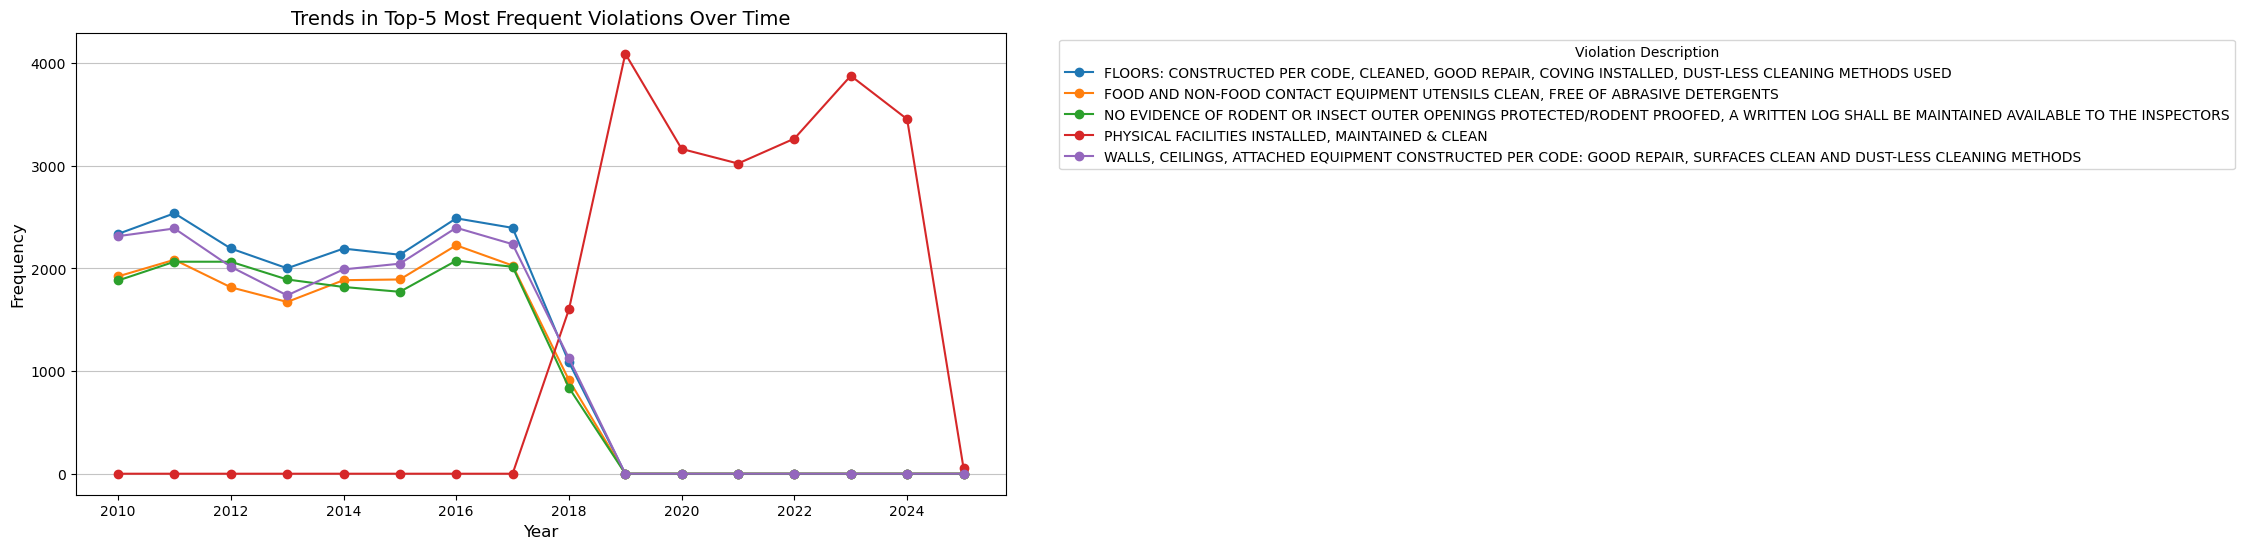

In [68]:
# Visualization: Line chart for trends over time
violation_trends_pivot = top_five_violation_trends.pivot(index='inspection_year', columns='regulation_descriptions', values='count').fillna(0)
plt.figure(figsize=(12, 6))
violation_trends_pivot.plot(marker='o', figsize=(12, 6))
plt.title('Trends in Top-5 Most Frequent Violations Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Violation Description', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

The first thing that we can observe from this plot is the sudden drop in four of the violations and sudden increase in frequency for one of the violations from years 2017 to 2019. This reason behind this anomaly is unclear without proper context but some possible situations that I've concluded are law or code revisions, or new recording methods, etc. Outside of these years however, the violations of these codes remain relatively constant across their repective years of being recorded. There is no clear increase or decrease in for the four violations logged from 2010 to 2017. There was, however, a drop in 2020 and 2021 of 'Physical Facilities Installed, Maintained & Clean' which is likely due to the COVID pandemic.